# EE 511 Assignment 3 - PartII
University of Washington<br>
Code by John Ragland and Doruk Arisoy<br>
Winter 2021

In [26]:
# Suppress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
from tools import Data
from collections import Counter
import time
import sklearn
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Some magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Processing the data

In [27]:
categories = [
    'alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
    'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x',
    'misc.forsale', 'rec.autos', 'rec.motorcycles', 
    'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 
    'sci.electronics', 'sci.med', 'sci.space', 
    'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 
    'talk.politics.misc', 'talk.religion.misc']

categories_short = [
    'atheism', 'graphics', 'win misc', 
    'win hard', 'mac hard', 'win x', 
    'forsale', 'auto', 'motocycles', 
    'baseball', 'hockey', 'crypt', 
    'elct', 'med', 'space', 
    'christian', 'guns', 'mideast',
    'politics misc', 'religion misc']

In [3]:
start = time.time()
data = Data(categories)
print(time.time() - start)

Calculating Vocabulary...
73686
Loading Testing Data...
Loading Training Data...
Splitting Training Data into Training and Validation...
371.28062200546265


In [4]:
print('Top 10 words in the vocab: %s' % (', '.join(map(str, (data.vocab[-10:])[::-1]))))
print('Top 10 values in the vocab: %s' % (', '.join(map(str, (data.vocab_vals[-10:])[::-1]))))

Top 10 words in the vocab: windows, god, sale, clipper, dod, government, re, he, team, people
Top 10 values in the vocab: 0.10689056198319917, 0.10450424621579651, 0.08432975343017271, 0.08230290678040691, 0.08023929848257759, 0.07921074939243042, 0.07865298183263716, 0.07569191875770331, 0.07458830854669563, 0.07416557350736769


## Comparing Data Representation Methods with Logistic Regression

In [12]:
model_bin = LogisticRegression()
model_bin.fit(data.train_bin, data.train_bin_labels)
bin_acc = 100.0 * model_bin.score(data.valid_bin, data.valid_bin_labels)
print('Binary input representation accuracy:  %.2f%%' % bin_acc)

Binary input representation accuracy:  85.49%


In [18]:
model_max = LogisticRegression()
model_max.fit(data.train_max, data.train_max_labels)
max_acc = 100.0 * model_max.score(data.valid_max, data.valid_max_labels)
print('Max input representation accuracy: %.2f%%' % max_acc)

Max input representation accuracy: 83.98%


In [7]:
model_log = LogisticRegression()
model_log.fit(data.train_log, data.train_log_labels)
log_acc = 100.0 * model_log.score(data.valid_log, data.valid_log_labels)
print('Log input representation accuracy: %.2f%%' % log_acc)

Log input representation accuracy: 86.46%


## Tuning Hyperparameters

In [10]:
Cs = np.random.uniform(0.01, 6, (20,1))
l_ratio = np.random.uniform(0,1,(20,1))

rand_search_acc = []

# Do 20 random searches for Hyperparameters (with very small iterations)
for k in range(20):
    print(f'Fitting Model no. {k+1}/20...')
    
    rand_search_mod = LogisticRegression(C=float(Cs[k]), penalty='elasticnet', l1_ratio=float(l_ratio[k]), solver='saga', max_iter=10)
    rand_search_mod.fit(data.train_log, data.train_log_labels)
    
    acc = 100 * rand_search_mod.score(data.valid_log, data.valid_log_labels)
    rand_search_acc.append(acc)
    print(f'    C={Cs[k]};    l_ratio={l_ratio[k]};    accuracy={rand_search_acc[k]}')

Fitting Model no. 1/20...
    C=[5.80324545];    l_ratio=[0.95428952];    accuracy=82.30088495575221
Fitting Model no. 2/20...
    C=[2.15096753];    l_ratio=[0.85278244];    accuracy=82.7433628318584
Fitting Model no. 3/20...
    C=[5.65498401];    l_ratio=[0.05526234];    accuracy=82.0353982300885
Fitting Model no. 4/20...
    C=[2.88409857];    l_ratio=[0.71786856];    accuracy=82.56637168141593
Fitting Model no. 5/20...
    C=[3.64962727];    l_ratio=[0.95757522];    accuracy=82.30088495575221
Fitting Model no. 6/20...
    C=[1.92918327];    l_ratio=[0.46399866];    accuracy=82.47787610619469
Fitting Model no. 7/20...
    C=[5.45409785];    l_ratio=[0.7786398];    accuracy=81.94690265486726
Fitting Model no. 8/20...
    C=[3.51433784];    l_ratio=[0.34374997];    accuracy=82.38938053097345
Fitting Model no. 9/20...
    C=[5.38965585];    l_ratio=[0.8531815];    accuracy=82.0353982300885
Fitting Model no. 10/20...
    C=[2.90801246];    l_ratio=[0.09977056];    accuracy=82.212389380

Best Regularization: [2.15096753]
Best L Ratio: [0.85278244]


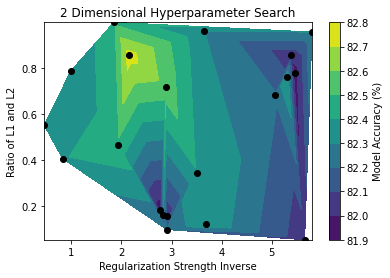

In [19]:
plt.tricontourf(np.squeeze(Cs),np.squeeze(l_ratio),np.array(rand_search_acc))
plt.xlabel('Regularization Strength Inverse')
plt.ylabel('Ratio of L1 and L2')
cbar = plt.colorbar()
cbar.set_label('Model Accuracy (%)')
plt.title('2 Dimensional Hyperparameter Search')
plt.plot(np.squeeze(Cs), np.squeeze(l_ratio), 'ko ')

best_C = Cs[np.argmax(np.array(rand_search_acc))]
best_lratio = l_ratio[np.argmax(np.array(rand_search_acc))]
print(f'Best Regularization: {best_C}')
print(f'Best L Ratio: {best_lratio}')

In [5]:
best_C = 2.15096753
best_lratio = 0.85278244

In [6]:
# Train Model With Best Parametecrs
best_model = LogisticRegression(C=float(best_C), penalty='elasticnet', l1_ratio=float(best_lratio), solver='saga',max_iter=150)
best_model.fit(data.train_log, data.train_log_labels)

LogisticRegression(C=2.15096753, l1_ratio=0.85278244, max_iter=150,
                   penalty='elasticnet', solver='saga')

## Evaluate the best model

In [7]:
best_acc = 100.0 * best_model.score(data.test_log, data.test_labels)
print('Best model accuracy: %.2f%%' % best_acc)

Best model accuracy: 75.27%


In [8]:
pred = best_model.predict(data.test_log)
confusion = metrics.confusion_matrix(data.test_labels, pred)

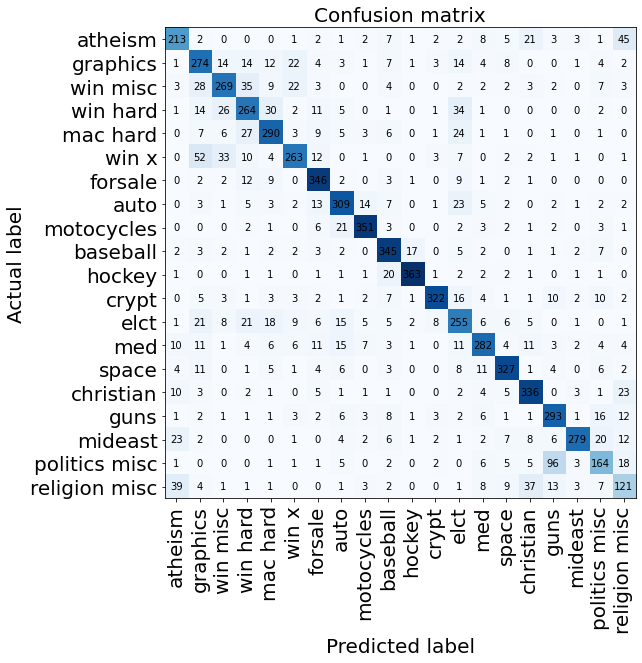

In [9]:
plt.figure(figsize=(9,9))
plt.imshow(confusion, interpolation='nearest', cmap='Blues')
plt.title('Confusion matrix', size = 20)
tick_marks = np.arange(20)
plt.xticks(tick_marks, categories_short, size = 20, rotation=90)
plt.yticks(tick_marks, categories_short, size = 20)
plt.tight_layout()
plt.ylabel('Actual label', size = 20)
plt.xlabel('Predicted label', size = 20)
width, height = confusion.shape
for x in range(width):
    for y in range(height):
        plt.annotate(confusion[x][y], xy=(y, x), horizontalalignment='center', verticalalignment='center')

In [12]:
misses = np.array([sum(line) - line[cat] for cat, line in enumerate(confusion)])
top_five = [categories[cat] for cat in misses.argsort()[-5::]]

# electronics, MS windows, computer graphics and PC hardware are very similar topics
# so it is understandable that the model confuses those 4 the most
print('Top 5 misclassified labels from worst to best: %s' % top_five)

Top 5 misclassified labels from worst to best: ['comp.sys.ibm.pc.hardware', 'comp.windows.x', 'talk.religion.misc', 'sci.electronics', 'talk.politics.misc']


## Model Inspection of the best model

In [11]:
for cat, features in enumerate(best_model.coef_):
    top_ten = [data.vocab[word] for word in features.argsort()[-10::]]
    bottom_ten = [data.vocab[word] for word in features.argsort()[:10]]
    print('Highest features for %s: %s' % (categories_short[cat], ', '.join(map(str, top_ten))))
    print('Lowest features for %s: %s' % (categories_short[cat], ', '.join(map(str, bottom_ten))))
    print()

Highest features for atheism: writes, mathew, political, bible, religion, islamic, atheism, god, keith, atheists
Lowest features for atheism: mail, ca, rutgers, get, thanks, may, with, use, called, used

Highest features for graphics: cview, format, polygon, tiff, points, pov, files, images, image, graphics
Lowest features for graphics: list, people, right, questions, who, really, us, drive, down, mit

Highest features for win misc: using, use, ftp, driver, drivers, cica, files, file, win, windows
Lowest features for win misc: of, he, we, who, by, his, question, ibm, mac, long

Highest features for win hard: motherboard, dos, scsi, gateway, ide, monitors, dx, monitor, card, pc
Lowest features for win hard: re, mac, sun, years, apple, we, code, latest, in, before

Highest features for mac hard: simms, monitor, duo, se, powerbook, lc, centris, quadra, apple, mac
Lowest features for mac hard: was, windows, who, com, dos, pc, were, his, controller, re

Highest features for win x: color, di

In [103]:
top_ten_mi_comp = []
for cat, features in enumerate(best_model.coef_):
    top_ten = [data.vocab[word] for word in features.argsort()[-10::]]
    bot_ten = [data.vocab[word] for word in features.argsort()[:10]]
    mi = []
    mi_bot = []
    for k in range(10):
        mi.append(data.vocab_vals[data.vocab.index(top_ten[k])])
        mi_bot.append(data.vocab_vals[data.vocab.index(bot_ten[k])])
    
    top_ten_mi_comp.append(top_ten)
    top_ten_mi_comp.append(mi)
    top_ten_mi_comp.append(bot_ten)
    top_ten_mi_comp.append(mi_bot)
    
top_ten_mi_comp = np.array(top_ten_mi_comp)

cat_expanded = []
for item in categories:
    cat_expanded.extend([item] * 4)
    
header = ['Most Positive Word Weights','Mutual Information','Most Negative Word Weights','Mutual Information']*20

top_words_table = pd.DataFrame(data=top_ten_mi_comp.T, columns=pd.MultiIndex.from_tuples(zip(cat_expanded,header)))
top_words_table.to_csv('problem_f_table.csv')
top_words_table

alt.atheism                                                   \
  Most Positive Word Weights    Mutual Information Most Negative Word Weights   
0                     writes   0.06379903590812087                       mail   
1                     mathew  0.009004579679546291                         ca   
2                  political   0.03370988632595016                    rutgers   
3                      bible  0.052473010434919004                        get   
4                   religion   0.04077150543349095                     thanks   
5                    islamic   0.02111815448821228                        may   
6                    atheism  0.024121034685860993                       with   
7                        god   0.10450424621579651                        use   
8                      keith  0.024457637074981914                     called   
9                   atheists  0.040563410000126025                       used   

                                     comp.graphics                        \
     Mutual Information Most Positive Word Weights    Mutual Information   
0   0.01832372889031742                      cview  0.005546811450652552   
1   0.01764323439984224                     format  0.013381020110263554   
2   0.05239963810769727                    polygon   0.00739765994835285   
3  0.009899722407617549                       tiff  0.008819441733723322   
4   0.04424730220588836                     points  0.010319889109000085   
5  0.017474609763932943                        pov  0.006625663766971251   
6   0.00947941375554605                      files  0.030714806633768715   
7  0.029850752091182375                     images  0.014409153283424547   
8  0.009519045092001376                      image  0.019218217913999327   
9  0.009382633304606735                   graphics   0.04673240737986587   

                                                      comp.os.ms-windows.misc  \
  Most Negative Word Weights    Mutual Information Most Positive Word Weights   
0                       list  0.006094090132132507                      using   
1                     people   0.07416557350736769                        use   
2                      right  0.015789895663952672                        ftp   
3                  questions  0.006978758411525351                     driver   
4                        who   0.06876118766809201                    drivers   
5                     really  0.012205938105336198                       cica   
6                         us  0.033273747667493754                      files   
7                      drive   0.03274147841405679                       file   
8                       down  0.016497489980811016                        win   
9                        mit   0.01488671351385685                    windows   

                         ...      talk.politics.mideast                        \
     Mutual Information  ... Most Negative Word Weights    Mutual Information   
0  0.031743683789274696  ...                     thanks   0.04424730220588836   
1  0.029850752091182375  ...                        use  0.029850752091182375   
2  0.025237298199392747  ...                        for  0.008392044311204341   
3   0.02159865578040958  ...                     anyone   0.01668559950589528   
4  0.020376216732701118  ...                         my  0.021668019107045244   
5   0.01199003436389485  ...                        the   0.02277150454939437   
6  0.030714806633768715  ...                       than   0.01799926311190681   
7   0.03614206102630237  ...                        out   0.01398596889128314   
8   0.04867410961850969  ...                     little  0.008833305916829138   
9   0.10689056198319917  ...                        but   0.01882851182677552   

          talk.politics.misc                                                   \
  Most Positive Word Weights    Mutual Information Most Negative Word Weights   
0                  pres